In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"E:\python projects\Datasets\supply chain\customer_feedback_data.csv", encoding='ISO-8859-1')

data.head()


,feedback_id,customer_id,product_id,review_date,review_text,rating,sentiment,verified_purchase
0,b81c5f98-b027-4b68-88e6-27991e6a2ac5,898c915d-4eaa-4283-b060-7b93ca491d44,dcf66460-7be4-4838-bcb0-ff0b1a060d37,2025-05-16,Exceeded expectations. Will definitely reorder.,4,positive,True
1,41f8e10b-7efb-4d26-a60d-5d355fe727b4,e7b57f51-d2ff-43ba-9d64-1a2c06ed3b81,56acf7c2-acb4-465b-8a3d-f388716a2f3f,2025-08-16,Im neither impressed nor disappointed.,3,neutral,True
2,87b59838-9846-4ed2-9e6b-5bedada372f5,3d43e323-2a29-4c14-b2e5-7d824380f23a,c87f8860-7af4-44a8-b2b0-ff3b4ca0a038,2024-10-28,Five stars! This is exactly what I needed.,4,positive,True
3,2639874f-5921-45f9-858c-ff3af275b547,facc5a3a-8b6a-463e-8062-d853c34815bf,53f5bdab-d500-4850-822f-51ef6eb7453c,2024-12-15,Fantastic experience from checkout to delivery.,4,positive,True
4,c8ff606a-52af-4675-aee1-2408912b7c35,c9c37ec6-9d7b-48b9-88dd-4f307695a8eb,de969247-7bca-41e3-82b7-1af764c0469c,2024-10-10,Five stars! This is exactly what I needed.,4,positive,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        50000 non-null  object
 1   customer_id        50000 non-null  object
 2   product_id         50000 non-null  object
 3   review_date        50000 non-null  object
 4   review_text        50000 non-null  object
 5   rating             50000 non-null  int64 
 6   sentiment          50000 non-null  object
 7   verified_purchase  50000 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 2.7+ MB


In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data['verified_purchase'].value_counts()

verified_purchase
True     40000
False    10000
Name: count, dtype: int64

In [6]:
data['sentiment'].value_counts()

sentiment
positive    38084
negative     6405
neutral      5511
Name: count, dtype: int64

In [7]:
new_data = data.drop(columns=["feedback_id", "customer_id", "product_id", "review_date", "rating", "verified_purchase"])
new_data

,review_text,sentiment
0,Exceeded expectations. Will definitely reorder.,positive
1,Im neither impressed nor disappointed.,neutral
2,Five stars! This is exactly what I needed.,positive
3,Fantastic experience from checkout to delivery.,positive
4,Five stars! This is exactly what I needed.,positive
...,...,...
49995,Reliable and durable. Worth every riyal.,positive
49996,"The product is functional, but lacks premium f...",neutral
49997,Great value for money. Highly recommended!,positive
49998,I wish I had read the reviews before buying.,negative


In [8]:
data = new_data[new_data['sentiment'] != 'neutral'].replace(['positive','negative'], [1, 0])
data

C:\Users\DELL2025\AppData\Local\Temp\ipykernel_10004\2610492845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = new_data[new_data['sentiment'] != 'neutral'].replace(['positive','negative'], [1, 0])


,review_text,sentiment
0,Exceeded expectations. Will definitely reorder.,1
2,Five stars! This is exactly what I needed.,1
3,Fantastic experience from checkout to delivery.,1
4,Five stars! This is exactly what I needed.,1
5,The packaging was neat and the product works f...,1
...,...,...
49993,Ive already recommended this to my friends.,1
49994,The worst online purchase Ive made.,0
49995,Reliable and durable. Worth every riyal.,1
49997,Great value for money. Highly recommended!,1


In [9]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL2025\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [12]:
import re
s = re.sub('[^a-zA-Z]', " ", data['review_text'][0])
s

'Exceeded expectations  Will definitely reorder '

In [13]:
s =  s.lower()
s

'exceeded expectations  will definitely reorder '

In [14]:
s = s.split()
s

['exceeded', 'expectations', 'will', 'definitely', 'reorder']

In [15]:
temp = []

for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['exceeded', 'expectations', 'definitely', 'reorder']

In [16]:
s= ' '.join(temp)
s

'exceeded expectations definitely reorder'

In [17]:
ss = SnowballStemmer('english')
s = ss.stem(s)
s

'exceeded expectations definitely reord'

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data['review_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
corpus = []

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['review_text'].iloc[i])
    review = review.lower()
    review = review.split()
    review = [ss.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [20]:
y= data['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
[[ 2101     0]
 [    0 12581]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2101
           1       1.00      1.00      1.00     12581

    accuracy                           1.00     14682
   macro avg       1.00      1.00      1.00     14682
weighted avg       1.00      1.00      1.00     14682



In [24]:
import joblib
joblib.dump(classifier, 'sentiment_analysis_model.pkl')

['sentiment_analysis_model.pkl']

Unique values in timestamp column: ['2025-09-09T12:28:55Z' '2025-09-09T14:45:27Z' '2025-09-09T16:33:45Z'
 '2025-09-09T17:56:52Z' 'Grand Total']
Data shape after cleaning: (49968, 1)
Date range: 2023-09-08 09:07:34+00:00 to 2025-09-09 17:56:52+00:00


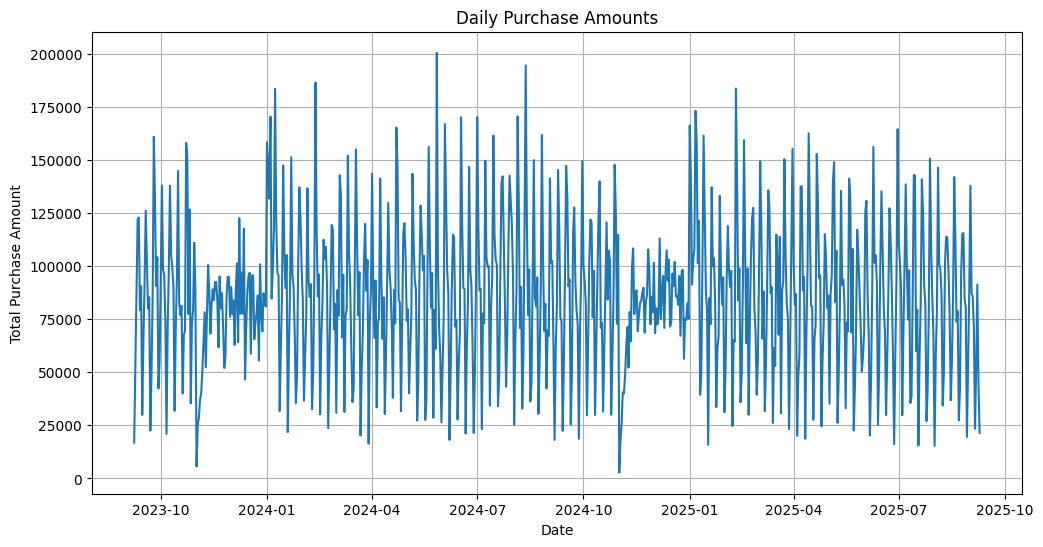

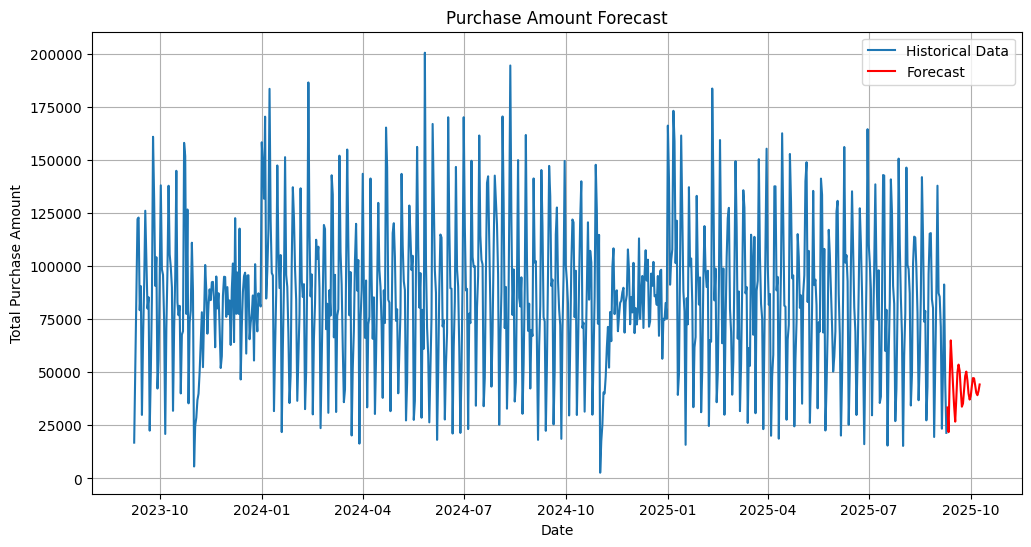

Forecast for next 30 days:
2025-09-10: 33420.08
2025-09-11: 21801.85
2025-09-12: 46745.38
2025-09-13: 64993.40
2025-09-14: 54628.51
2025-09-15: 44037.63
2025-09-16: 34155.17
2025-09-17: 26744.41
2025-09-18: 37923.78
2025-09-19: 49935.27
2025-09-20: 53584.56
2025-09-21: 50700.90
2025-09-22: 41501.08
2025-09-23: 33777.61
2025-09-24: 35285.18
2025-09-25: 41795.37
2025-09-26: 48267.60
2025-09-27: 50317.70
2025-09-28: 46142.50
2025-09-29: 39997.71
2025-09-30: 37127.19
2025-10-01: 38868.49
2025-10-02: 43558.55
2025-10-03: 47274.91
2025-10-04: 47112.75
2025-10-05: 43799.00
2025-10-06: 40282.44
2025-10-07: 39194.18
2025-10-08: 41141.56
2025-10-09: 44237.30


In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data and clean it
df = pd.read_csv(r'E:\python projects\Datasets\supply chain\Sales_data (2).csv')

# Check for non-date values in the timestamp column
print("Unique values in timestamp column:", df['PURCHASE_TIMESTAMP'].unique()[-5:])  # Show last 5 values

# Filter out non-date rows (like "Grand Total")
df = df[pd.to_datetime(df['PURCHASE_TIMESTAMP'], errors='coerce').notnull()]

# Convert to datetime and set as index
df['PURCHASE_TIMESTAMP'] = pd.to_datetime(df['PURCHASE_TIMESTAMP'])
df = df.set_index('PURCHASE_TIMESTAMP')

# Verify the data
print("Data shape after cleaning:", df.shape)
print("Date range:", df.index.min(), "to", df.index.max())

# Resample to daily frequency and sum amounts
daily_data = df.resample('D').sum()

# Check if we have enough data for forecasting
if len(daily_data) < 30:
    print("Warning: Not enough data for reliable forecasting")
    
# Plot the time series to visualize patterns
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Daily Purchase Amounts')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

# Fit ARIMA model (you might need to adjust parameters based on your data)
try:
    model = ARIMA(daily_data, order=(5,1,0))
    model_fit = model.fit()
    
    # Make forecast for next 30 days
    forecast = model_fit.forecast(steps=30)
    
    # Create future dates
    future_dates = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=30)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index, daily_data.values, label='Historical Data')
    plt.plot(future_dates, forecast, label='Forecast', color='red')
    plt.title('Purchase Amount Forecast')
    plt.xlabel('Date')
    plt.ylabel('Total Purchase Amount')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print forecast values
    print("Forecast for next 30 days:")
    for date, value in zip(future_dates, forecast):
        print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")
        
except Exception as e:
    print(f"Error in ARIMA modeling: {e}")
    print("Trying with simpler model...")
    
    # Try with simpler model
    try:
        model = ARIMA(daily_data, order=(1,1,1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=30)
        
        # Create future dates
        future_dates = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=30)
        
        # Plot results
        plt.figure(figsize=(12, 6))
        plt.plot(daily_data.index, daily_data.values, label='Historical Data')
        plt.plot(future_dates, forecast, label='Forecast', color='red')
        plt.title('Purchase Amount Forecast')
        plt.xlabel('Date')
        plt.ylabel('Total Purchase Amount')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print forecast values
        print("Forecast for next 30 days:")
        for date, value in zip(future_dates, forecast):
            print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")
            
    except Exception as e2:
        print(f"Error with simpler model too: {e2}")
        print("Consider using a different forecasting method or checking your data quality.")